<hr>
<br><br>
    <h1 align=center><font size = 5>Projeto final -  
    <br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Laura Damaceno de Almeida</font></h1>
<br><br>
</h1>

<div style="margin-left: 2em; margin-right:5em; text-align:justify">
    <font size=2>
    Notebook desenvolvido para estudo do desempenho do modelo de árvore de decisão em conjunto com o Bagging Ensemble.
        <br><br>
            Esse estudo teve como base o paper realizado por [Rajdhan et al. 2020], que buscada identificar o desempenho dos classificadores na identificação de doenças cardíacas. A partir dos resultados obtidos neste paper, o objetivo deste projeto é melhorar o desempenho do algoritmo de árvore de decisão.

</div>

<h4><u> Etapas do notebook</u></h4>

1. [Preparação do ambiente](#1)<br>
[Importação das bibliotecas](#11)<br>
[Leitura dos dados](#12)<br><br>

2. [Análise descritiva](#2)<br><br>

3. [Divisão teste e treino](#3)<br><br>

4. [Modelagem](#4)<br>
[Decision Tree sem ensembles](#41)<br>
[Testes com ensembles](#42)<br><br>

5. [Avaliação](#5)<br>
[Avaliando o modelo sem os parâmetros definidos](#51)<br>
[Avaliando o modelo com apenas n_estimators definido](#52)<br>
[Avaliando o modelo com n_estimators e max_samples definidos](#53)<br>
<hr>

### 1. Preparação de Ambiente
<a id="1"></a>

<h4>1.1 Importação de bibliotecas:</h4><a id="11"></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn import tree


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 

## Dicionário



**cp**: Severidade da dor no peito que o paciente está sofrendo

**trestbps**: pressão sanguínea em repouso

**chol**: colesterol sérico em mg / dl

**fbs**: açúcar no sangue em jejum> 120 mg / dl

**restecg**: resultados eletrocardiográficos de repouso (valores 0,1,2)

**thalach**: frequência cardíaca máxima alcançada

**exang**: usado para identificar se há um angina induzida por exercício. Se sim = 1 ou senão não = 0

**oldpeak**: pico antigo = depressão de ST induzida por exercício em relação ao repouso

**slope**: descreve a condição do paciente durante o pico do exercício. É dividido em três segmentos (não inclinado, plano, para baixo inclinado)

**ca**: Resultado da fluoroscopia

**thal**: teste requerido para paciente sofrendo de dor no peito ou dificuldade em respirar. São 4 tipos de valores que representam Teste de tálio.

**target**: É a coluna final do conjunto de dados. É classe ou rótulo Colum. Isto representa o número de classes em conjunto de dados. Este conjunto de dados tem binários classificação, ou seja, duas classes (0,1). classe “0” representa que há menos
possibilidade de doença cardíaca, enquanto “1” representa grandes chances de coração doença. O valor “0” ou “1” depende de outros 13 atributos.

<h4>1.2 Leitura dos dados:</h4><a id="12"></a>


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



### 2. Analise descritiva
<a id="2"></a>

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

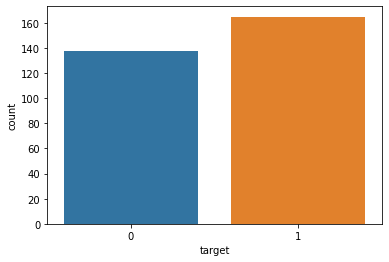

In [5]:
sns.countplot(df.target)

0 menor possibilidade de doença cardíaca

1 maior possibiidade de doença cardíaca

Temos mais amostras de pacientes com maior probabilidade de doença cardíaca

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Severidade da dor no peito que o paciente está sofrendo')

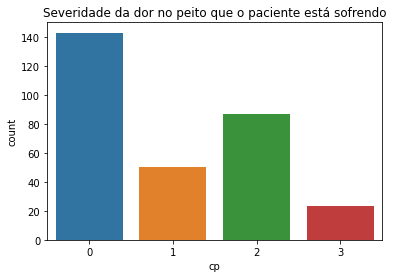

In [20]:
ax = sns.countplot(df.cp)
ax.set_title('Severidade da dor no peito que o paciente está sofrendo')

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Genero do paciente')

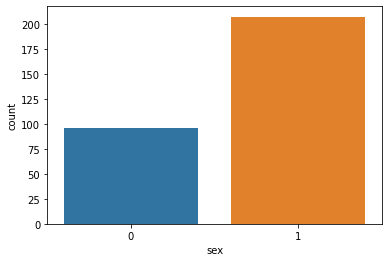

In [21]:
sns.countplot(df.sex)
ax.set_title('Genero do paciente')

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='count'>

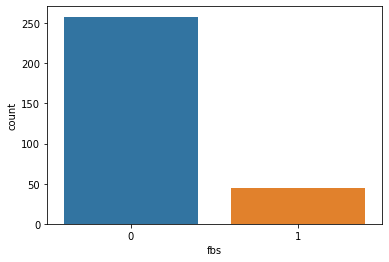

In [11]:
sns.countplot(df.fbs)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

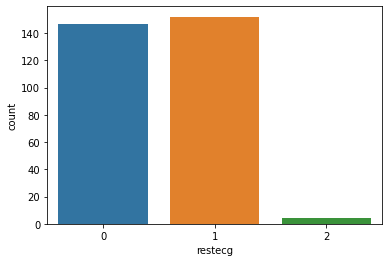

In [12]:
sns.countplot(df.restecg)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='count'>

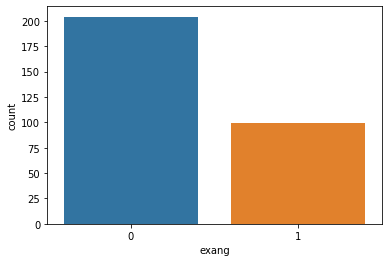

In [13]:
sns.countplot(df.exang)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='count'>

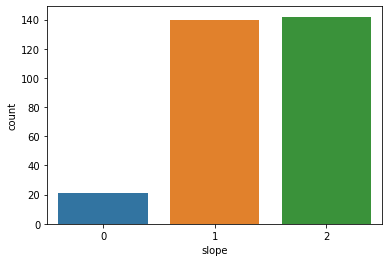

In [14]:
sns.countplot(df.slope)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

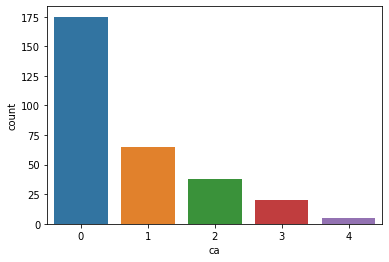

In [15]:
sns.countplot(df.ca)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

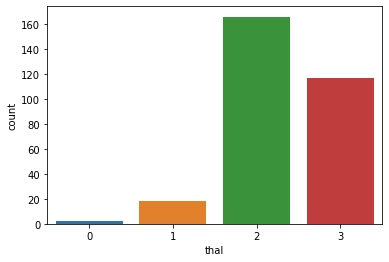

In [16]:
sns.countplot(df.thal)

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


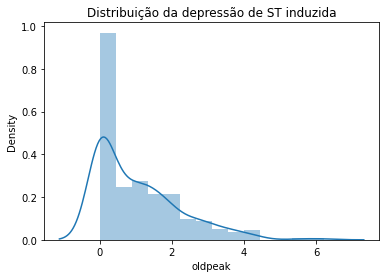

In [25]:

ax = sns.distplot(df['oldpeak'])
ax.set_title('Distribuição da depressão de ST induzida')
ax=ax

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


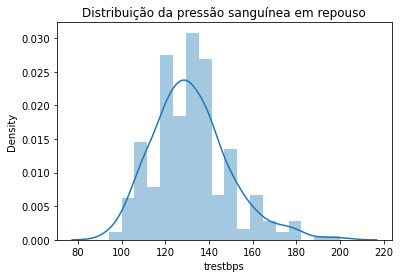

In [27]:

ax = sns.distplot(df['trestbps'])
ax.set_title('Distribuição da pressão sanguínea em repouso')
ax=ax

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


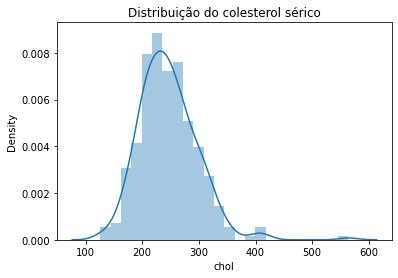

In [29]:

ax = sns.distplot(df['chol'])
ax.set_title('Distribuição do colesterol sérico')
ax=ax

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\Fenix\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


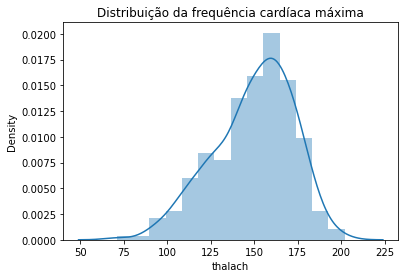

In [31]:

ax = sns.distplot(df['thalach'])
ax.set_title('Distribuição da frequência cardíaca máxima')
ax=ax


### 3. Divisão teste e treino
<a id="3"></a>


In [4]:
X = df.drop(columns=['target'])
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811) #80% para treino e 20% pra teste


In [5]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3


In [6]:
y_train

187    0
31     1
195    0
86     1
67     1
      ..
28     1
73     1
68     1
215    0
84     1
Name: target, Length: 242, dtype: int64



### 4. Modelagem
<a id="4"></a>


In [16]:
def matriz_confusao(real, predito):
    matriz = metrics.confusion_matrix(real,predito)
    fig, ax = plt.subplots()
    classes = df['target'].unique()
    im = ax.imshow(matriz,cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(matriz.shape[1]),
           yticks=np.arange(matriz.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusão',
           ylabel='True label',
           xlabel='Predicted label')
    thresh = matriz.max().mean()
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            ax.text(j, i, format(matriz[i, j]),
                ha="center", va="center",
                color="white" if matriz[i, j] > thresh else "black")
    fig.tight_layout()

<h4>4.1 Decision Tree sem ensembles:</h4><a id="41"></a>


In [72]:
arvore_sem_balanc = DecisionTreeClassifier(random_state=2870)


In [73]:
arvore_sem_balanc.fit(X_train,y_train)


DecisionTreeClassifier(random_state=2870)

In [74]:
arvore_sem_balanc.score(X_train,y_train)


1.0

In [75]:
predTree = arvore_sem_balanc.predict(X_test)


In [76]:
print('Report da classificação: ', metrics.classification_report(y_test,predTree))


Report da classificação:                precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.84      0.89      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [31]:
print("Acurácia do modelo: ",metrics.accuracy_score(y_test, predTree)*100)

Acurácia do modelo:  83.60655737704919


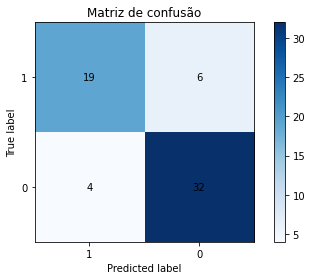

In [32]:
matriz_confusao(y_test,predTree)


In [77]:

target = y_train.astype(str)
tree.export_graphviz(arvore_sem_balanc,out_file='arvore.dot',
                feature_names = X_train.columns,
                class_names=target.unique())

In [78]:
!dot -Tpng arvore.dot -o arvore.png -Gdpi=600


'dot' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


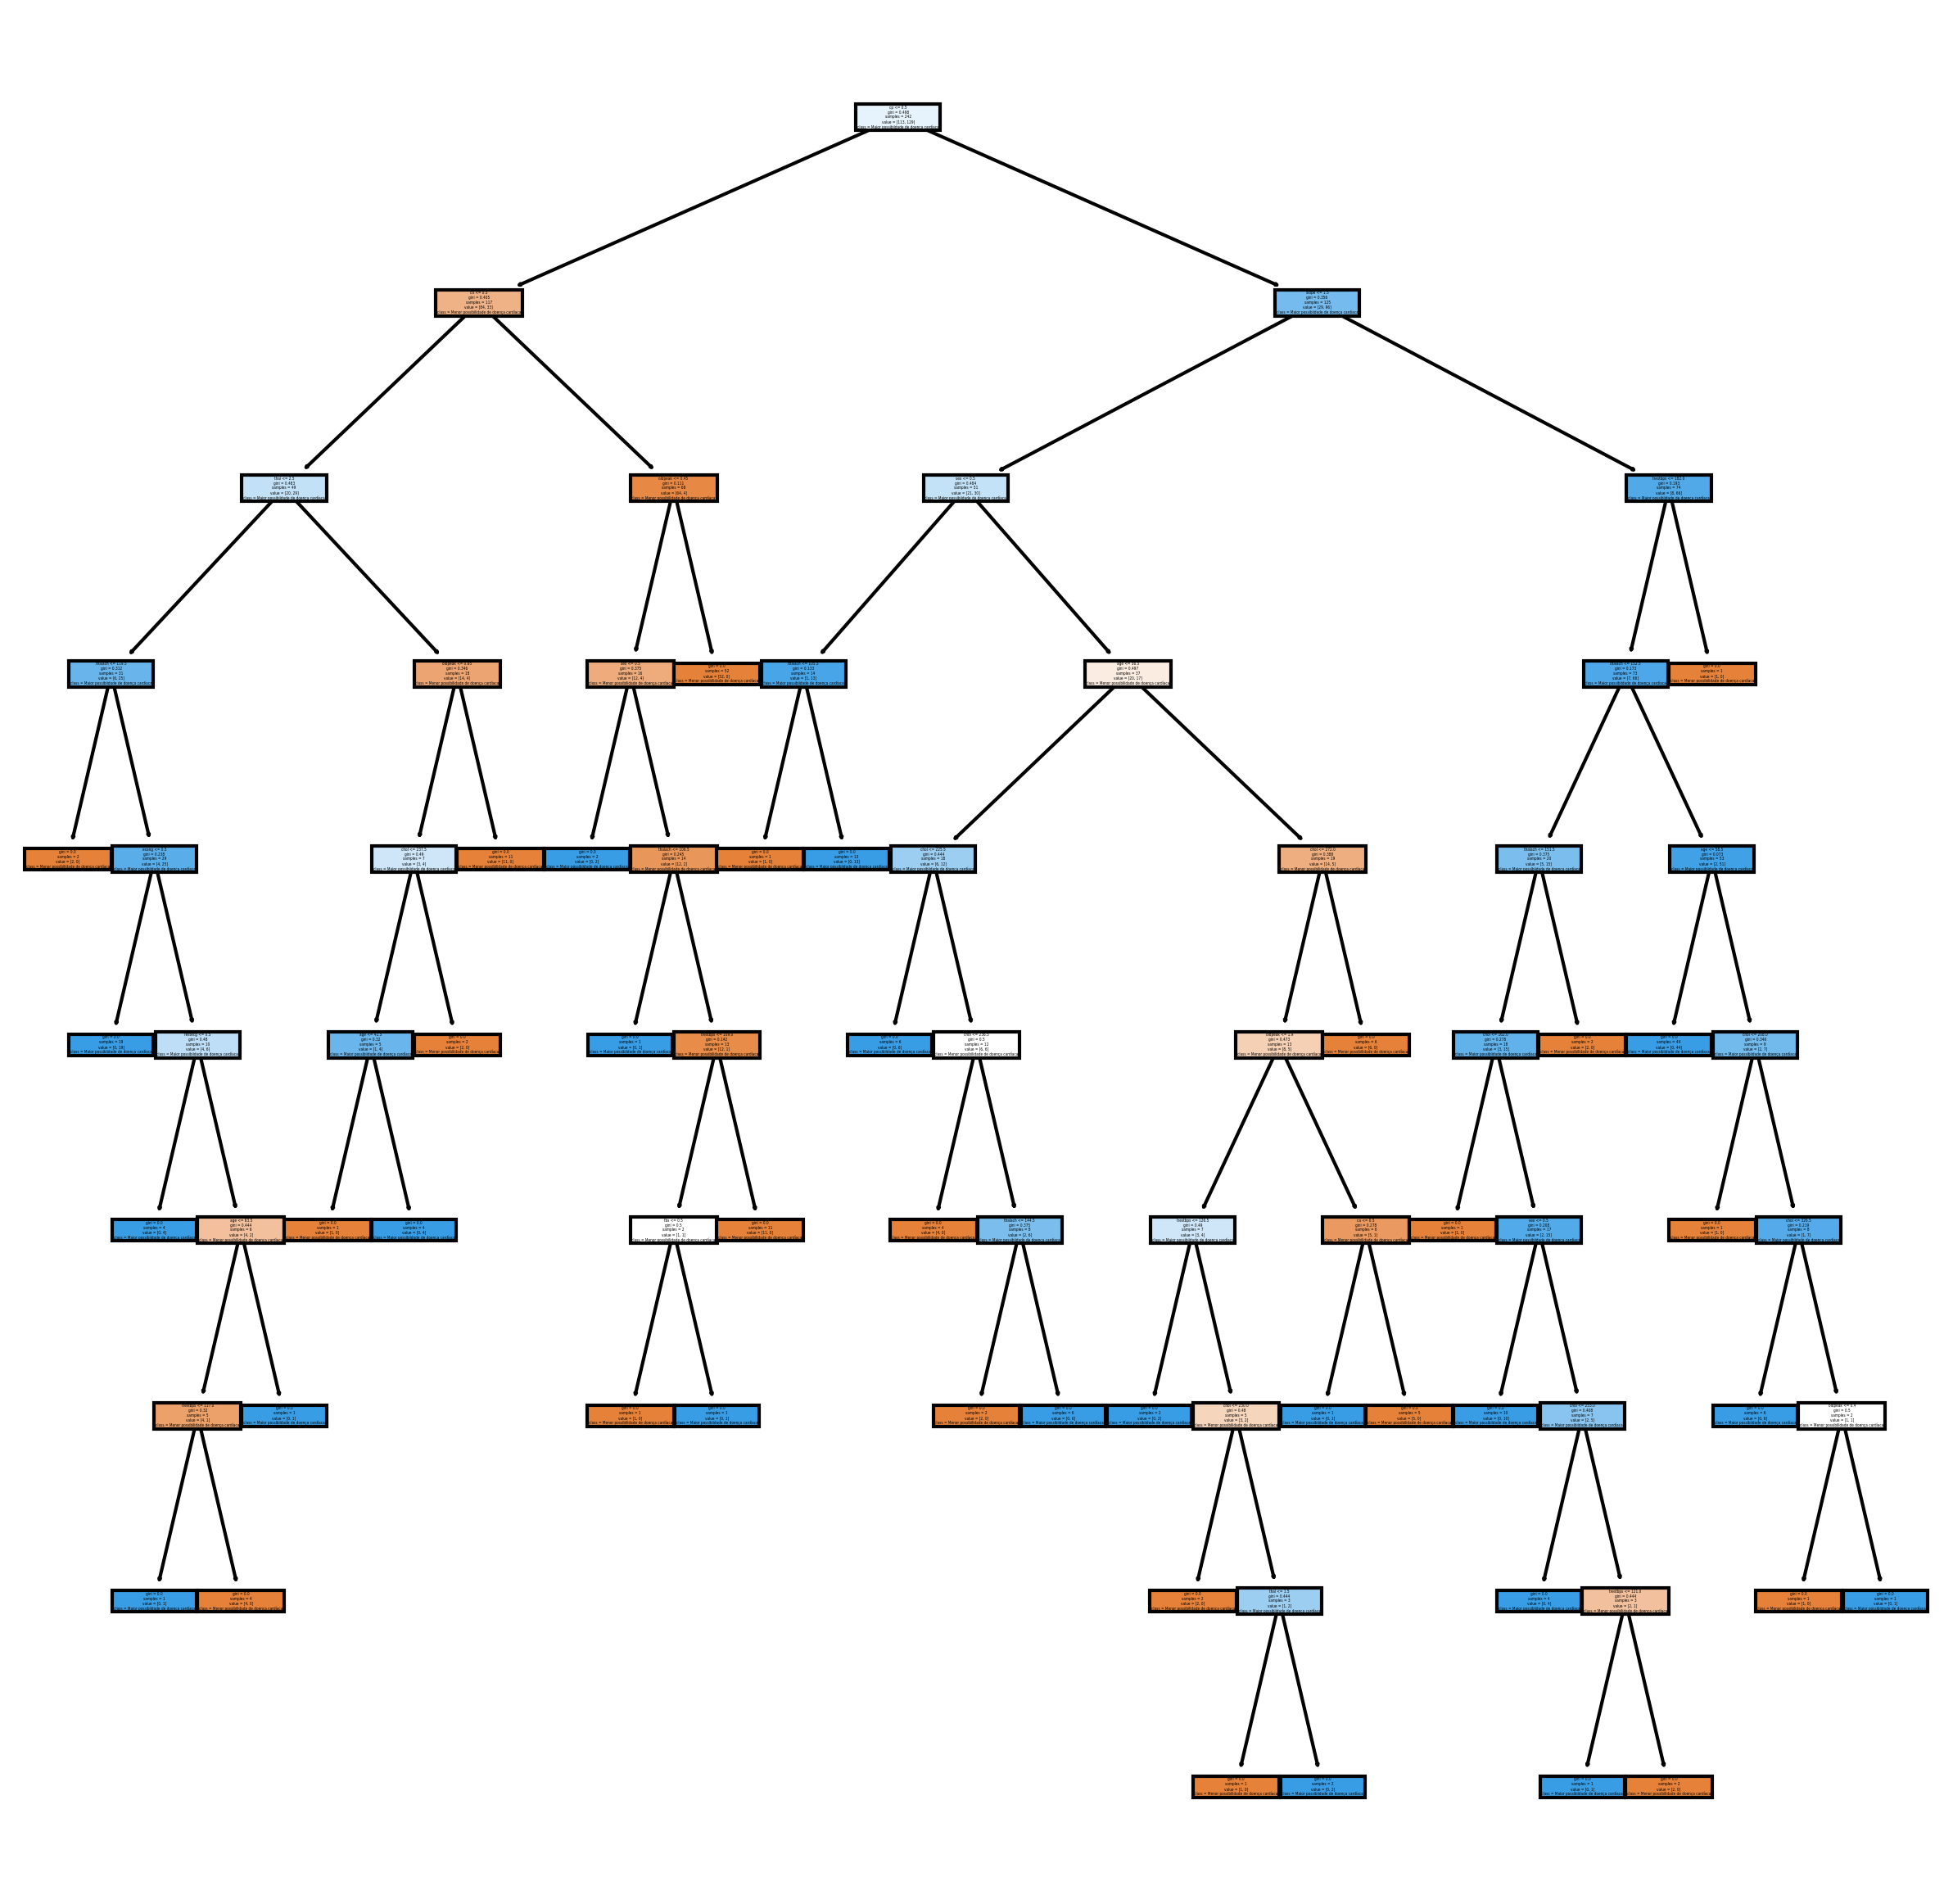

In [91]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['Menor possibilidade de doença cardíaca', 'Maior possibiidade de doença cardíaca']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(arvore_sem_balanc,
               feature_names = X_train.columns, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


<h4>4.2 Testes com ensembles:</h4><a id="42"></a>


In [92]:
# Método para testar os parâmetros n_tree 
def get_models_n_tree():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500,1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

In [93]:
# Método para testar os parâmetros max_samples 
def get_models_max_samples(n_estimators):
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(n_estimators=n_estimators,max_samples=i)
    return models

In [94]:
# Avaliar o modelo usando cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=['accuracy','precision','recall','f1'], cv=cv, return_train_score=True)
    return scores

In [106]:
results, names = list(), list()

def get_performance(models):
    df_results = pd.DataFrame(np.zeros(1)) # definindo um dataframe para armazenar os valores do teste


    for name, model in models.items():
    # avaliação do modelo
        scores = evaluate_model(model, X_train, y_train)

        # armazena os resultados
        results.append(scores['test_accuracy'])
        names.append(name)
        df_results[name+'_media_acuracia'] = np.mean(scores['test_accuracy'])
        df_results[name+'_std_acuracia'] = np.std(scores['test_accuracy'])
        df_results[name+'_media_precisao'] = np.mean(scores['test_precision'])
        df_results[name+'_std_precisao'] = np.std(scores['test_precision'])
        df_results[name+'_media_recall'] = np.mean(scores['test_recall'])
        df_results[name+'_std_recall'] = np.std(scores['test_recall'])
        df_results[name+'_media_f1'] = np.mean(scores['test_f1'])
        df_results[name+'_std_f1'] = np.std(scores['test_f1'])
    return df_results

In [107]:
models_n_tree = get_models_n_tree() 
results_ntree = get_performance(models_n_tree)



In [108]:
pd.set_option('display.max_rows', None)

results_ntree.T

,0
0,0.000000
10_media_acuracia,0.785204
10_std_acuracia,0.042490
10_media_precisao,0.815058
10_std_precisao,0.054046
10_media_recall,0.778708
10_std_recall,0.074243
10_media_f1,0.793492
10_std_f1,0.043303
50_media_acuracia,0.797585


O melhor parametro é 1000 para n_estimators

In [109]:
models = get_models_max_samples(n_estimators=1000) 
result_final = get_performance(models)

In [110]:
result_final.T

,0
0,0.000000
0.1_media_acuracia,0.818299
0.1_std_acuracia,0.057940
0.1_media_precisao,0.800273
0.1_std_precisao,0.056142
0.1_media_recall,0.882277
0.1_std_recall,0.061278
0.1_media_f1,0.838206
0.1_std_f1,0.050705
0.2_media_acuracia,0.822330


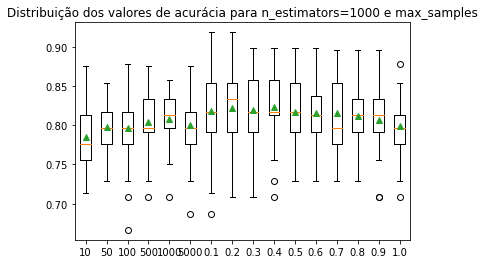

In [130]:
plt.boxplot(results, labels=names, showmeans=True)

plt.title('Distribuição dos valores de acurácia para n_estimators=1000 e max_samples')
plt.show()

### 5. Avaliação
<a id="5"></a>

<h4>5.1 Avaliando o modelo sem os parâmetros definidos:</h4><a id="51"></a>


In [32]:
model = BaggingClassifier(random_state=287)
# fit the model on the whole dataset

model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_test)
# print('Prediction: %d' % yhat[0])
print('Report da classificação: ', metrics.classification_report(y_test,yhat))


Report da classificação:                precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



<h4>5.2 Avaliando o modelo com apenas n_estimators definido:</h4><a id="52"></a>


In [132]:
model = BaggingClassifier(n_estimators=1000,random_state=287)
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_test)
print('Prediction: %d' % yhat[0])

Prediction: 1


In [133]:
print('Report da classificação: ', metrics.classification_report(y_test,yhat))


Report da classificação:                precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.82      0.86      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61




<h4>5.3 Avaliando o modelo com n_estimators e max_samples definidos:</h4><a id="53"></a>

In [117]:
model = BaggingClassifier(n_estimators=1000,max_samples=0.2,random_state=287)
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_test)
print('Prediction: %d' % yhat[0])

Prediction: 1


In [118]:
print('Report da classificação: ', metrics.classification_report(y_test,yhat))


Report da classificação:                precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [119]:
acuracia = accuracy_score(y_test, yhat)
print('Acurácia: %f' % acuracia)

Acurácia: 0.836066


In [120]:
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)

Precision: 0.825000


In [121]:
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)

Recall: 0.916667


In [122]:
f1 = f1_score(y_test, yhat)
print('F1-Score: %f' % f1)

F1-Score: 0.868421


In [123]:
model = BaggingClassifier(n_estimators=1000,max_samples=0.4,random_state=287)
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_test)
print('Prediction: %d' % yhat[0])

Prediction: 1


In [124]:
print('Report da classificação: ', metrics.classification_report(y_test,yhat))


Report da classificação:                precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.82      0.89      0.85        36

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [125]:
acuracia = accuracy_score(y_test, yhat)
print('Acurácia: %f' % acuracia)

Acurácia: 0.819672


In [126]:
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)

Precision: 0.820513


In [127]:
f1 = f1_score(y_test, yhat)
print('F1-Score: %f' % f1)

F1-Score: 0.853333


In [128]:
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)

Recall: 0.888889
